In [1]:
import gymnasium as gym

import sys
sys.path.append("src")

import numpy as np
import torch
from torch import nn

from models.dqn import DQN
from env import make_env
from ptUtils.hparams import HParam

import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

from array2gif import write_gif

/home/kbh/.conda/envs/dnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config

In [2]:
ENV_NAME = "ALE/KungFuMaster-v5"
version = 17
path_chkpt = "chkpt/v"+str(version)+"_best.pt"
device = "cuda:0"
seed = np.random.randint(100000)

env = make_env(ENV_NAME,clip_rewards=False,seed=seed,real=True)
env_disp = make_env(ENV_NAME,clip_rewards=False,seed=seed,disp=True,real=True)
state_shape = env.observation_space.shape
n_actions = env.action_space.n


A.L.E: Arcade Learning Environment (version 0.8.0+919230b)
[Powered by Stella]


## Model

In [3]:
hp = HParam("config/v{}.yaml".format(version),"config/default.yaml")

if hp.train.type == "DQN" : 
    agent = DQN(state_shape=state_shape, n_actions=n_actions,dueling=hp.model.dueling).to(device)
elif hp.train.type == "policy_gradient" : 
    agent = DQN(state_shape=state_shape, n_actions=n_actions,policy=True).to(device)
else : 
    print("ERROR")
agent.load_state_dict(torch.load(path_chkpt))
agent.eval()

Network:: dueling False | policy False | value False.


DQN(
  (block_1): Sequential(
    (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (block_5): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=14, bias=True)
  )
)

## Eval

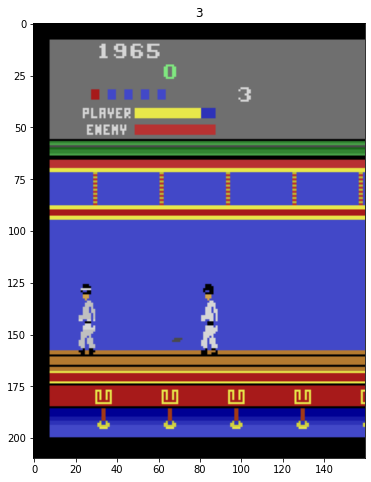

In [ ]:
s = env.reset()

img = env_disp.reset()[0]
plt.ion()
fig= plt.figure(figsize=(8, 8))
im = plt.imshow(img)

done = False 
step = 0
with torch.no_grad() : 
    while not done : 
        #print(state.shape)
        if hp.train.type == "DQN" : 
            qvalues = agent.get_qvalues(s)
            action = qvalues.argmax(axis=-1)[0]
        else : 
            logits = agent.forward([s])
            action = agent.best_actions(logits)[0]
            
        plt.title(action)
        s, reward, done, _, _ = env.step(action)
        img,_,done_disp,_,_ = env_disp.step(action)
        
        im.set_data(img)
        display(fig)    
        step+=1
        
        clear_output(wait = True)
#clear_output(wait = True)
print(reward)

## Gen output

In [4]:
for iii in range(10) : 
    seed = np.random.randint(100000)
    print(seed)
    env = make_env(ENV_NAME,clip_rewards=False,seed=seed,real=True)
    env_disp = make_env(ENV_NAME,clip_rewards=False,seed=seed,disp=True,real=True)
    
    s = env.reset()
    img = env_disp.reset()[0]
    done = False 
    step = 0
    rw = 0
    list_img = []
    with torch.no_grad() : 
        while not done : 
            #print(state.shape)
            if hp.train.type == "DQN" : 
                qvalues = agent.get_qvalues(s)
                action = qvalues.argmax(axis=-1)[0]
            else : 
                logits = agent.forward([s])
                action = agent.best_actions(logits)[0]

            s, reward, done, _, _ = env.step(action)
            img,_,done_disp,_,_ = env_disp.step(action)
            rw += reward

            list_img.append(np.transpose(img,(1,0,2)))
            step+=1
    print(rw)
    write_gif(list_img, 'v{}_{}.gif'.format(version,int(rw)), fps=20)

56889
5600.0
2474
1400.0
43845
1800.0
99639
3200.0
44043
6900.0
44237
1500.0
36441
2100.0
56259
6800.0
20601
800.0
54537
2600.0


## Random

In [3]:
ENV_NAME = "ALE/KungFuMaster-v5"
for iii in range(10) : 
    seed = np.random.randint(100000)
    print(seed)
    env_disp = make_env(ENV_NAME,clip_rewards=False,seed=seed,disp=True,real=True)
    
    img = env_disp.reset()[0]
    done = False 
    step = 0
    rw = 0
    list_img = []
    with torch.no_grad() : 
        while not done : 
            #print(state.shape)
           
            action = np.random.randint(14)

            img,reward,done,_,_ = env_disp.step(action)
            rw += reward

            list_img.append(np.transpose(img,(1,0,2)))
            step+=1
    print(rw)
    write_gif(list_img, 'random_{}.gif'.format(int(rw)), fps=20)

67095


A.L.E: Arcade Learning Environment (version 0.8.0+919230b)
[Powered by Stella]


500.0
20698
300.0
30774
200.0
3528
1200.0
95865
300.0
41806
600.0
60883
1100.0
21032
1200.0
58576
400.0
36970
100.0
